# SC42150 - Statistical Signal Processing
## Python Assignment I: Stock Market Analysis

#### Team members

- Kosma Krzyzanowski (5063671):
- Name (5094704): 


## Introduction

The goal of this assignment is to help you get a more practical understanding of some of the concepts of Statistical Signal Processing. Specifically, you will work with stochastic processes and determine their moments, stationarity and ergodicity properties, and also try to detrend the data.

In order to achieve those objectives, you will use the Python programming language, and specifically the modules numpy, scipy (for numerical processing) and matplotlib (for plotting). In case you are completely unfamiliar with Python, you should learn the basics before attempting this exercise. You are allowed to use numpy's implementations of common routines, such as mean or cov amongst other, but if you do so make sure you have read the documentation and are sure that they accomplish exactly what is taught in the lecture notes, as sometimes there are small differences in definitions and implementations. 

Finally, you are also going to use the Jupyter Notebook file format, which might require installing some dependencies on your system. You can find instructions on installing Jupyter [here](https://jupyter.org/install).

## Reporting

The report of this python exercise consists of this Jupyter Notebook file, with your answers added after each question. Answers will consist of code and/or text (markdown) cells. Please use the already indicated cells and format. You will **also** need to deliver a `PDF` version of this file.

In order to create a PDF version of this file, go to the top left, click on `File` then `Export Notebook As` and Choose `PDF`.
If this feature is not supported by your system, you can also choose `LaTeX`. 
Then, you can use your preferred `LaTeX` compiler to create the `PDF`. After generation you PDF report, please double check if all answers/plots are correctly displayed.

Moreover, you will also need to send the `.npz` file with the signals used in this exercise. Don't forget to edit your team member's name and student number above. You will submit one Jupyter notebook per team.

##### Stock market analysis

Lately you've been fascinated by the world of trading so you decided to learn more about it and see if you can learn any good strategies by examining the trading data and looking for patterns.

You are given a `.npz` file containing historical price data of various stocks. We will make the assumption that all the timeseries are just different realizations of the same stochastic process.

You will need to conduct the following steps to complete your investigation, each of which is worth 1 point:

**1. (5 points)** Import the `.npz` file provided using `np.load()` as indicated below. You should now have access to a $N\times K$ array, containing $K$ timeseries of historical price data of various stocks, each of length $N$. Plot the first one and also, in a new figure, plot the first 100 of them together. Label your axes and figures clearly.

In [22]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal

data = np.load('data2024.npz')
S =  data['S']
t =  data['t']


(1000, 1000)


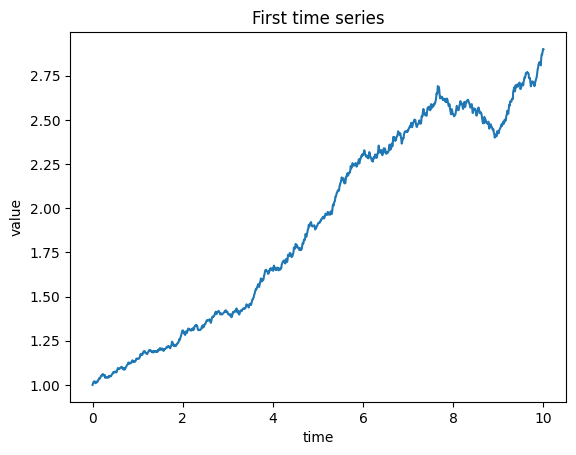

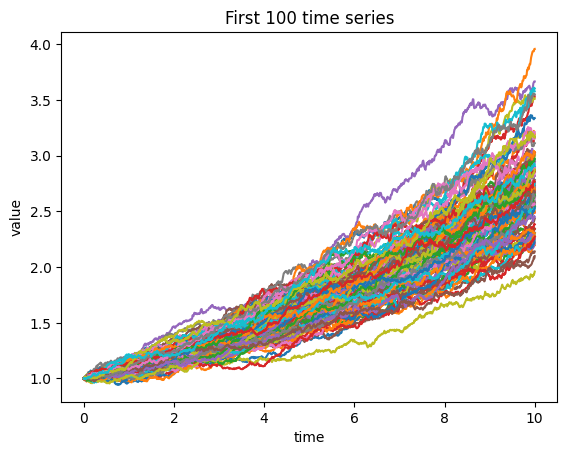

In [23]:
print(S.shape)


plt.plot(t, S[:, 0])
plt.xlabel('time')
plt.ylabel('value')
plt.title('First time series')
plt.show()


for i in range(100):
    plt.plot(t, S[:, i])

plt.xlabel('time')
plt.ylabel('value')
plt.title('First 100 time series')
plt.show()


**2. (15 points)** Using the data provided, perform a linear regression on the first timeseries from $S$. The linear regression model can be represented as:

$$S[n +1]= a S[n] +e[n]$$

where $a$ is unknown and $e$ is zero mean white noise.

Specifically, fit a linear model to the price data and plot the best-fit line along with the original data usimg Least Square method. Label the axes and the figure clearly.


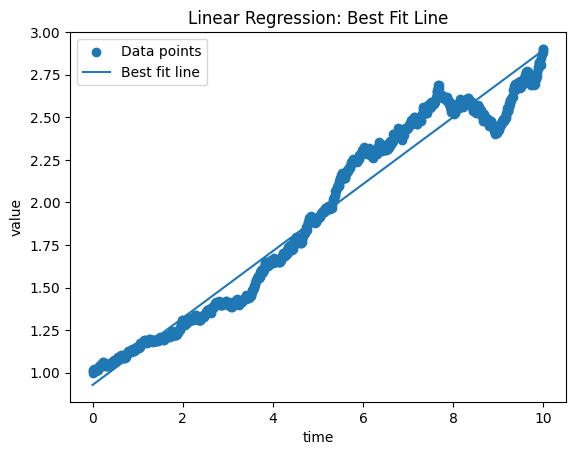

In [24]:
# Implement your computations below
from sklearn.linear_model import LinearRegression

S1 = S[:, 0]  # Use the first timeseries
t_reshaped = t.reshape(-1, 1)   # Reshape t for linear regression model

model = None # Fit linear regression model

# Implement your plots below

model = LinearRegression()

# Fit the model to the data
model.fit(t_reshaped, S1)

# Predict values using the model to get the best fit line
y_pred = model.predict(t_reshaped)

# Plot the original data points
plt.scatter(t_reshaped, S1, label='Data points')

# Plot the best fit line
plt.plot(t_reshaped, y_pred, label='Best fit line')

# Add labels and title
plt.xlabel('time')
plt.ylabel('value')
plt.title('Linear Regression: Best Fit Line')

# Show the legend and plot
plt.legend()
plt.show()

**3. (15 points)** Consider the following nonlinear model

$$S[n+1] = a_{1} S[n] + a_{2} S[n-1] + a_{3} S^{2}[n] + a_{4} S^{2}[n-1] + a_{5} S[n] S[n-1] + e[n]$$

where $a_{1}, a_{2}, a_{3}, a_{4}, a_{5}$ are all unknowns and $e[n]$ is noise.

Perform a non linear regression on the first timeseries from $S$ using least square method. Plot and label the axes and the figure clearly.


0.9996909501479603
[ 0.92041121  0.08760651 -3.62923685 -3.68665427  7.31386794]


C:\Users\kohlh\AppData\Local\Temp\ipykernel_2428\1454029858.py:28: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


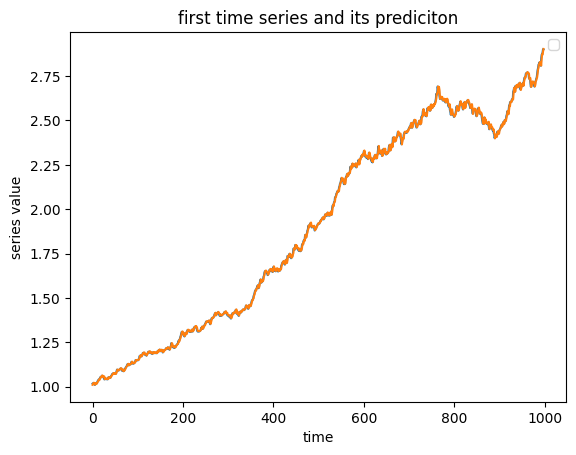

In [25]:
# Implement your computations below
from sklearn.linear_model import LinearRegression

S1 = S[:, 0]  # Use the first timeseries

t_reshaped = t.reshape(-1, 1)   # Reshape t for linear regression model
#print(t_reshaped.shape)
# make a matrix from the time series that can be used to be multiplied by the a coeffiecents
# each row represents the use of the nonlinear model mentioned above
phi = np.array([S1[1:-1], S1[:-2], np.power(S1[1:-1], 2), np.power(S1[:-2], 2), np.multiply(S1[:-2], S1[1:-1])]).T
# phi2 = np.array([S2[1:-1], S2[:-2], np.power(S2[1:-1], 2), np.power(S2[:-2], 2), np.multiply(S2[:-2], S1[1:-1])]).T
# print(phi.shape)

#solution vector
y = S1[2:]
# y2 = S2[2:]
# print(y.shape)
model = LinearRegression().fit(phi, y) # Fit linear regression model
print(model.score(phi, y))
print(model.coef_)

# Implement your plots below
plt.plot(y)
plt.plot(model.predict(phi))
plt.xlabel('time')
plt.ylabel('series value')
plt.title('first time series and its prediciton')
plt.legend()
plt.show()

We will denote the generating stochastic process by $S_{n}\sim f_{S_{n}}$, where $n=\displaystyle \frac{t}{\Delta t}$ refers to the time index for $n=\{0,1,\ldots,999\}$. Furthermore, we will denote its $k$-th realization by $S_{n}^{k}$ for $k=\{1,2,\ldots,1000\}$.

**4. (10 points)** Compute the ensemble mean and variance and plot each one in separate figures. Label your axes and figures clearly.

C:\Users\kohlh\AppData\Local\Temp\ipykernel_2428\3127251086.py:18: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


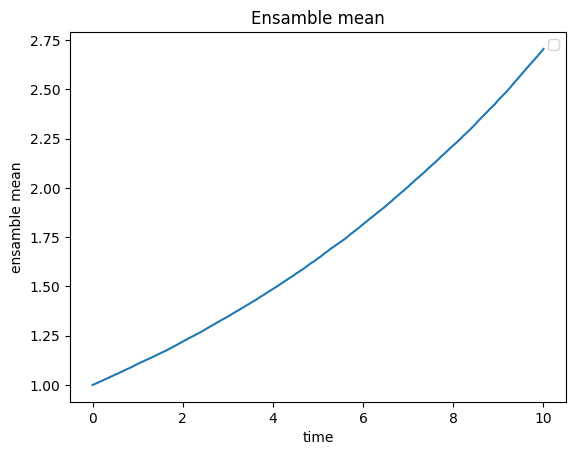

C:\Users\kohlh\AppData\Local\Temp\ipykernel_2428\3127251086.py:25: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


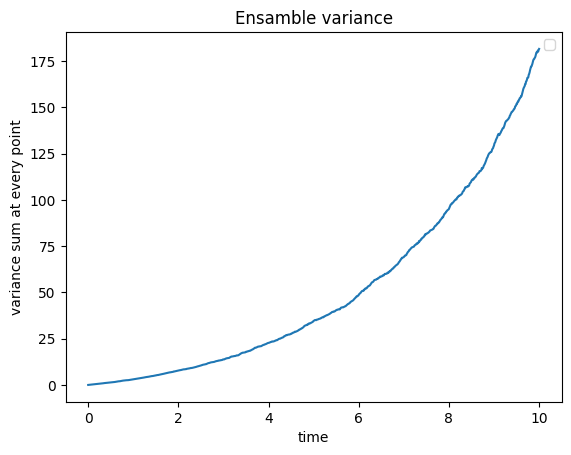

In [26]:
# Implement your computations below
length = len(S[i, :])

S_mean_ens = np.zeros(length) # Ensemble mean of Sn
S_variance_ens = np.zeros(length) # Ensemble variance of Sn


for i in range(length):
    a = np.sum(S[i, :])/length
    S_mean_ens[i] = a
    S_variance_ens[i] = np.sum((S[i, :] - a)**2)


plt.plot(t, S_mean_ens)
plt.xlabel('time')
plt.ylabel('ensamble mean')
plt.title('Ensamble mean')
plt.legend()
plt.show()

plt.plot(t, S_variance_ens)
plt.xlabel('time')
plt.ylabel('variance sum at every point')
plt.title('Ensamble variance')
plt.legend()
plt.show()
# Implement your plots below

**5. (15 points)** Compute the covariance matrix $C_{S}$ and the correlation matrix $R_{S}$ for the process $S_n$ and $n =\{0,1,\ldots,999\}$, and visualize them using the `plt.matshow()` command. What can you deduce from the plots? Is the process $S_{n}$ WSS? Justify your answer.

**Note:** You are not allowed to use the `np.corrcoef`, `np.corrcoef` and `np.cov()` built-in functions.

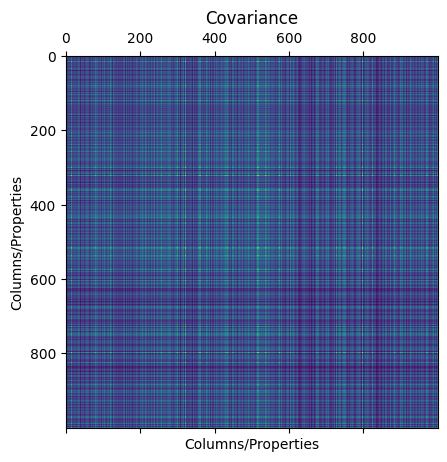

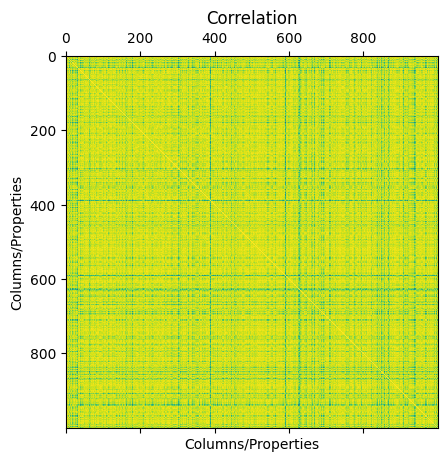

In [27]:
# Implement your computations below

n = S.shape[0]
# print(S_test)

# substract the mean of each clolumn from their values
S_0mean = np.matrix([column - np.mean(column) for column in S.T]).T

C_S = 1/(n-1) * S_0mean.T * S_0mean

R_S = (np.identity(n) * np.diag(C_S)**(-.5)) * C_S * (np.identity(n) * np.diag(C_S)**(-.5))

# C_S = None # Covariance matrix
# R_S = None # Correlation matrix
# Implement your plots below

plt.matshow(C_S)
plt.xlabel('Columns/Properties')
plt.ylabel('Columns/Properties')
plt.title('Covariance')
plt.show()


plt.matshow(R_S)
plt.xlabel('Columns/Properties')
plt.ylabel('Columns/Properties')
plt.title('Correlation')
plt.show()





**Answer:**
>The mean of the columns is different, meaning that the first condition is not met, so the matrix is not WSS. This is also validated by the structure of the covariance matrix. If it was WSS the covariance matrix should have the same values on the diagonal and parallel to diagonal lines. 


A friend of yours who has been into trading for some time now, briefly looks at the data and tells you that the stock price changes can be explained by asset model like the following Equation (1):
$$
    S_{n+1} =\alpha S_{n}^{\beta} e^{z_n}, \quad Z_{n}\sim\mathcal{N}(0,1)
$$

where $\alpha$ and $\beta$ are unknowns. 

In your efforts to make sense of ([1](#mjx-eqn-asset_model)), you apply a transformation $X_{n+1}=\log\left(S_{n+1}\right)$ to your data. 

This looks promising so you decide to try this transformation on the data you have.

**6. (15 points)** Derive an expression for $X_n$ using (1). Estimate $\alpha$ and $\beta$ for equation (1) using least square method. 


**Answer 1**
>$$
    X_{n+1} = log(\alpha) + \beta log(S_n) +Z_n log(e)
$$

1.0023923698286716 0.9993972708770713


C:\Users\kohlh\AppData\Local\Temp\ipykernel_2428\413679200.py:29: UserWarning: No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.
  plt.legend()


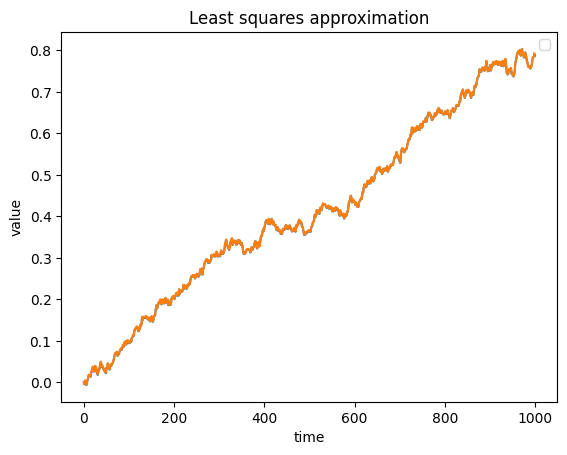

In [28]:
# Implement your computations below
S1 = S[:, 1]
X1 = np.log(S1)

X = X1[:-1].reshape(-1, 1)
y = X1[1:]  # S[n+1]

# Implement least square method
model = LinearRegression()
model.fit(X, y)

pred = model.predict(X)
a = model.coef_[0]
b = model.intercept_

beta = a
alpha = 10 ** (b)

print(alpha, beta)

y_fit = a * X.flatten() + b

# Implement your plots below
plt.plot(X1)
plt.plot(y_fit)
plt.xlabel('time')
plt.ylabel('value')
plt.title('Least squares approximation')
plt.legend()
plt.show()


**7. (10 points)** For a single realization of $S_{n}$ for $k=3$, compute its auto-correlation function $r_{x}({l})$ and plot it for various values of $l$. Verify whether **Properties 5.8 - 5.10** apply to this process.

**Note:** if the signal $s(n)$ is auto-correlation ergodic,
the auto-correlation function $r_s(l)$ can be estimated as
(if we have only values $s_1, s_2, \dots, s_N$):

$$
    r_s(l) = \frac{1}{N-l} \sum_{i=l+1}^{N} s(i) s^*(i-l)
$$


**Note:** if you are unfamiliar with python, take care when copying `np.arrays`. Read more [here](https://numpy.org/doc/stable/reference/generated/numpy.copy.html).

**Note:** You are not allowed to use the built-in function `np.correlate()`.

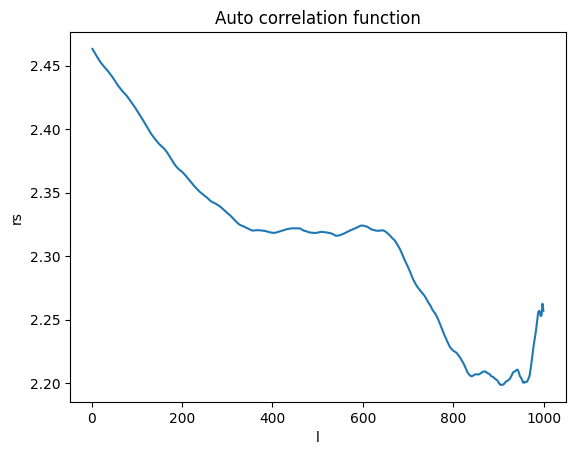

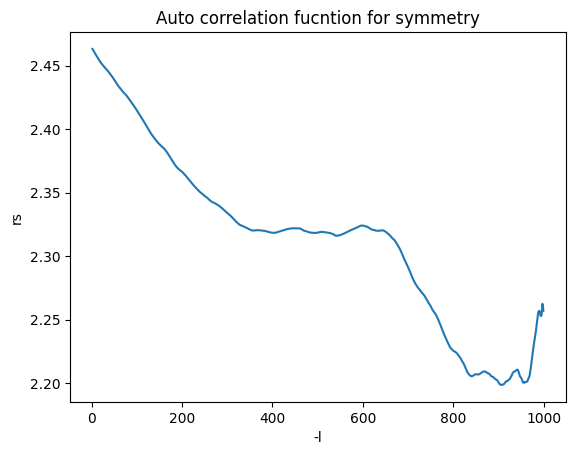

In [29]:
# Implement your computations below 
Sk3 = S[:,2].copy()

def rs(l, s = Sk3):
    N = s.shape[0]
    return 1/(N - l) * np.sum(s[l:]*s[:N-l].T)

# Implement your plots below
l_array = np.array([l for l in range(2,1000)])
rs_array = np.array([rs(l) for l in l_array])


plt.plot(l_array, rs_array)
plt.xlabel('l')
plt.ylabel('rs')
plt.title('Auto correlation function')
plt.show()

#checking symmetry
# taking the value of the series as 0 where it is undefined:
def rs2(l, s = Sk3):
    N = s.shape[0]
    return 1/(N - l) * np.sum(s[:N-l]*s[l:].T)

# Implement your plots below
rs_array = np.array([rs2(l) for l in l_array])
plt.plot(l_array, rs_array)
plt.xlabel('-l')
plt.ylabel('rs')
plt.title('Auto correlation fucntion for symmetry')
plt.show()



> My understanding of the first condition of a signal being WSS is that the mean of the different preoperties (= columns) at a given time (= row) has to be constant. 
This condition is not met, which makes me believe that our signal is not WSS. The propites 5.8 - 5.10 all say that they are properties of WSS signals. 5.9 and 5.10 also require the signal to be complex otherwise it is trivial that they hold. As tested 5.8 holds but 5.9 and 5.10 are not applicable.> (Enter your answer here)

**8. (15 points)** Take two time instances of $S_{n}$, e.g. for $n=\{35,65\}$, and plot their 2d histogram across $K$ realizations $\{S_{n}^{k}\}_{k=1}^{K}$ by using 32 bins. Can you adequately fit a multivariate normal distribution on this histogram?


**Hint:** You may want to look into multivariate_normal.pdf() to help plot the levels of fitting distribution in 2D. To plot the experimental values, you may use plt.hist2d().

Text(0, 0.5, 'Timeseries 65')

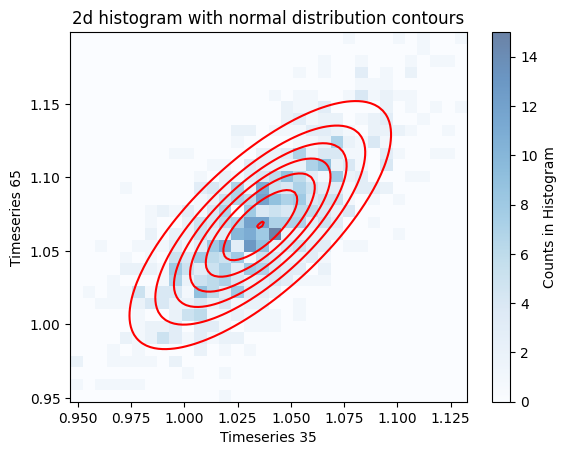

In [30]:
# Implement your plots below
import statistics

K = 1000
instances = np.array([35, 65])
data = np.zeros((2, K))
j = 0
for i in instances:
    a = S[i, :K]
    data[j] = a
    j += 1
mean = np.mean(data, axis=1)
covariance_matrix = np.cov(data)

x, y = np.mgrid[np.min(data[0]) : np.max(data[0]) : 100j, np.min(data[1]) : np.max(data[1]) : 100j]
pos = np.dstack((x, y))

rv = multivariate_normal(mean, covariance_matrix)

pdf_values = rv.pdf(pos)

h = plt.hist2d(data[0], data[1], bins=32, cmap='Blues', alpha=0.6)

plt.colorbar(h[3], label='Counts in Histogram')

plt.contour(x, y, pdf_values, colors='red', linewidths=1.5)

plt.title("2d histogram with normal distribution contours")
plt.xlabel("Timeseries " + str(instances[0]))
plt.ylabel("Timeseries " + str(instances[1]))



